# How to Build a Neural Network & Make Predictions

(https://realpython.com/python-ai-neural-network/#train-your-first-neural-network)

## Dot Product

In [8]:
# Find which of the weights is more similar to the input vector, 
# taking into account the direction and the magnitude.
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

In [9]:
# Manually compute dot product
dot_prod_1 = input_vector[0] * weights_1[0] + input_vector[1] * weights_1[1]
dot_prod_1

2.1672

In [1]:
import numpy as np

In [10]:
# Use NumPy to compute dot product
dot_prod_1 = np.dot(input_vector, weights_1)
dot_prod_1

2.1672

In [11]:
dot_prod_2 = np.dot(input_vector, weights_2)
dot_prod_2

4.1259999999999994

## Build Neural Network with Classification Problem Example

Make predictions. The result can be either 0 or 1.

Inputs and outputs of the dataset:

|input vector|target|
|-|-|
|[1.66, 1.56]|1|
|[2, 1.5]|0|


In [6]:
input_vector = np.array([1.66, 1.56])  # example data
weights_1 = np.array([1.45, -0.66])  # random weights
bias = np.array([0.0])  # random bias

In [7]:
# Sigmoid function limits the output to a range between 0 and 1
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

In [8]:
def predict(input_vector, weights, bias): 
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

In [9]:
prediction = predict(input_vector, weights_1, bias)
prediction
# The result is > 0.5, correct prediction

array([0.7985731])

In [10]:
input_vector_2 = np.array([2, 1.5])
prediction_2 = predict(input_vector_2, weights_1, bias)
prediction_2
# The result is > 0.5, wrong prediction

array([0.87101915])

## Train Neural Network

### Computing the Prediction Error

In [11]:
# Access how bad the wrong prediction was
# using Mean Squared Error (MSE)
target = 0
mse = np.square(prediction_2 - target)
mse

array([0.75867436])

### Understanding How to Reduce the Error

In [12]:
# The derivative of np.square(x) is 2 * x
derivative = 2 * (prediction_2 - target)
derivative
# The result is 1.74, a positive number, 
# so you need to decrease the weights.

array([1.7420383])

In [13]:
# Update the weights 
weights_1_updated = weights_1 - derivative

# Predict again
prediction_2_updated = predict(input_vector, weights_1_updated, bias)
prediction_2_updated
# After updating the weights, the prediction is close to 0, which is more as the same as target

array([0.01431593])

In [14]:
mse_updated = np.square(prediction_2_updated - target)
mse_updated
# After updating the weights, the mse is very small now

array([0.00020495])

### Adjusting the Parameters With Backpropagation

In [15]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [16]:
# Applying chain rule, backpropagation
derror_dprediction = 2 * (prediction_2 - target)

layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)

dlayer1_dbias = 1

derror_dbias = derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
derror_dbias

### Creating the Neural Network Class

In [6]:
class MyNeuralNetwork: 
    def __init__(self, learning_rate): 
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        
    def _sigmoid(self, x): 
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def predict(self, input_vector): 
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        return layer_2
    
    def _compute_gradients(self, input_vector, target): 
        prediction = self.predict(input_vector)
        
        derror_dprediction = 2 * (prediction - target)

        layer_1 = np.dot(input_vector, self.weights) + self.bias
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)

        dlayer1_dbias = 1
        
        # The derivative of the dot product is 
        # the derivative of the first vector multiplied by the second vector, 
        # plus the derivative of the second vector multiplied by the first vector
        dlayer1_dweights = 0 * self.weights + 1 * input_vector

        derror_dbias = derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        derror_dweights = derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        
        return derror_dbias, derror_dweights
    
    def _update_parameters(self, derror_dbias, derror_dweights): 
        self.bias = self.bias - derror_dbias * self.learning_rate
        self.weights = self.weights - derror_dweights * self.learning_rate

    def train(self, input_vectors, targets, iterations): 
        # Used to save cumulative errors, and then plot
        cumulative_errors = []
        
        for curr_iter in range(iterations): 
            random_data_index = np.random.randint(len(input_vectors))
            
            # Pick a data instance at random
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]
            
            # Compute the gradients and update the parameters
            derror_dbias, derror_dweights = self._compute_gradients(input_vector, target)
            self._update_parameters(derror_dbias, derror_dweights)
            
            # Measure the cumulative error over all data instances every 100 iterations
            if curr_iter % 100 == 0:
                cumulative_error = 0
                
                for data_instance_index in range(len(input_vectors)):
                    data_instance = input_vectors[data_instance_index]
                    target = targets[data_instance_index]
                    
                    prediction = self.predict(data_instance)
                    error = np.square(prediction - target)
                    
                    cumulative_error = cumulative_error + error
                    
                cumulative_errors.append(cumulative_error)
            
        return cumulative_errors

In [19]:
# Make one prediction
learning_rate = 0.1
neural_network = MyNeuralNetwork(learning_rate)

neural_network.predict(input_vector_2)

0.6633773095149041

### Training the Network With More Data

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Generate dummy data
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1]
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

In [7]:
learning_rate = 0.1
neural_network = MyNeuralNetwork(learning_rate)

training_errors = neural_network.train(input_vectors, targets, 10000)

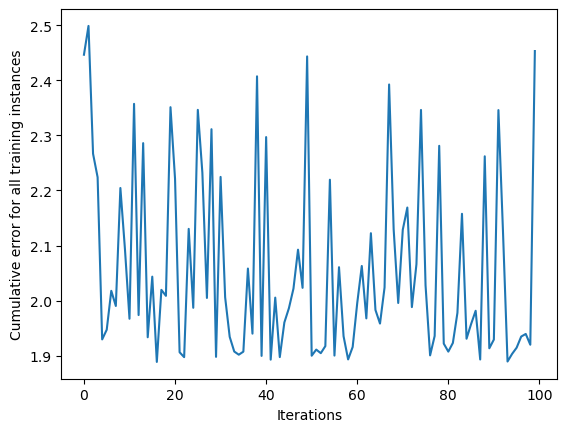

In [8]:
plt.plot(training_errors)
plt.xlabel("Iterations")
plt.ylabel("Cumulative error for all training instances")
plt.savefig("cumulative_errors.png")